In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

In [2]:
sample1 = 'TieredSM'
sample2 = 'OldSM'
#p_value = '0.04'
color1 = 'goldenrod'
color2 = 'darkgreen'
irfylabel='rho'

In [3]:
file = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22_tiered/PBMC_decon/All/perctcorr/methodsumary_newposscore_spearman_correlation_cytof.txt'
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

df_pos = df[df[sample1] >= df[sample2]]
df_neg = df[df[sample1] < df[sample2]]

In [4]:
df_pos.shape

(8, 2)

In [5]:
df_neg.shape

(4, 2)

In [6]:
_,p_value=np.around(wilcoxon(df[sample1],df[sample2]),decimals=2)

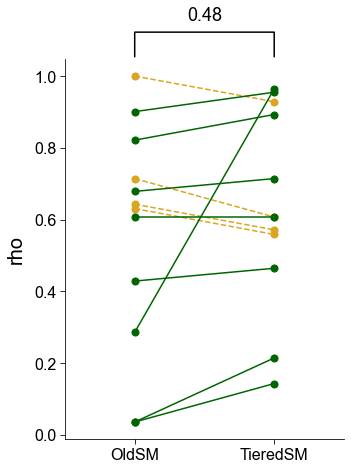

In [7]:
hfont = {'fontname':'Arial'}
arr_0 = df_pos[sample2]
arr_1 = df_pos[sample1]

arr_2 = df_neg[sample2]
arr_3 = df_neg[sample1]

fig, ax = plt.subplots(1, 1, figsize=(5, 7))
for i in range(len(arr_2)):
    plt.plot([0.0, 1.0], [arr_2[i], arr_3[i]], c=color1, ls='--')
    
ax.scatter(np.zeros(len(arr_2)), arr_2, c=color1, s=50)
ax.scatter(np.zeros(len(arr_3)) + 1, arr_3, c=color1, s=50)
    
for i in range(len(arr_0)):
    plt.plot([0.0, 1.0], [arr_0[i], arr_1[i]], c=color2)
ax.scatter(np.zeros(len(arr_0)), arr_0, c=color2, s=50)
ax.scatter(np.zeros(len(arr_1)) + 1, arr_1, c=color2, s=50)

ax.set_xlim(-0.5, 1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.xticks([0.0, 1.0], [sample2, sample1])
#plt.ylim([-0.1, 1.0])
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

for label in ax.get_xticklabels():
    label.set_fontproperties('Arial')
    
for label in ax.get_yticklabels():
    label.set_fontproperties('Arial')

plt.annotate('', xy=(0.245, 1.07), xycoords='axes fraction', \
             xytext=(0.755, 1.07), fontsize=18, ha='left', \
             arrowprops=dict(arrowstyle="-", color='k', lw=1.5))

plt.annotate('', xy=(0.25, 1.075), xycoords='axes fraction', \
             xytext=(0.25, 1.00), fontsize=18, ha='left', \
             arrowprops=dict(arrowstyle="-", color='k', lw=1.5))

plt.annotate('', xy=(0.75, 1.075), xycoords='axes fraction', \
             xytext=(0.75, 1.00), fontsize=18, ha='left', \
             arrowprops=dict(arrowstyle="-", color='k', lw=1.5))

plt.annotate(p_value, xy=(0.5, 1.09), xycoords='axes fraction', fontsize=18, ha='center', va='bottom', **hfont)
    
ax.set_ylabel(irfylabel,fontsize=20, labelpad=8, **hfont)
ax.tick_params(labelsize=16, size=5)

In [8]:
fig.savefig(file + '_corr.pdf', dpi=300, bbox_inches='tight')